# A Scientific Python Tutorial: Coding Game of Life (GoL)

![title](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)


## Part 1: Introduction

### Introductory readings
* https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
* http://web.stanford.edu/~cdebs/GameOfLife/#history

### What is GoL ?
GoL is not really a game as long as players are not required. It is played on a chessboard-like grid on which **cells** exist in two states: **dead (0)** and **alive (1)**. The state of the cells evolve at every **step** depending on two rules :
* The **survival rule (S)**: in GoL, if a living cell has 2 or 3 living cells among its neighbors, it stays alive, otherwise it dies.
* The **birth rule: (B)**: if a cell has 3 living cells among its neighbors, it gets alive.

Don't hesitate to try existing online simulators to understand how the game works: https://bitstorm.org/gameoflife/


## Part 2: Counting living neighbors

In this part, you will learn how to count the number of neighbors around a each cell.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc, cm
rc('animation', html='html5')
%matplotlib nbagg

We can easily create a random binary matrix usin **numpy**

In [67]:
cells = np.random.randint(2, size = (5, 5))
cells

array([[1, 0, 1, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1]])

<IPython.core.display.Javascript object>


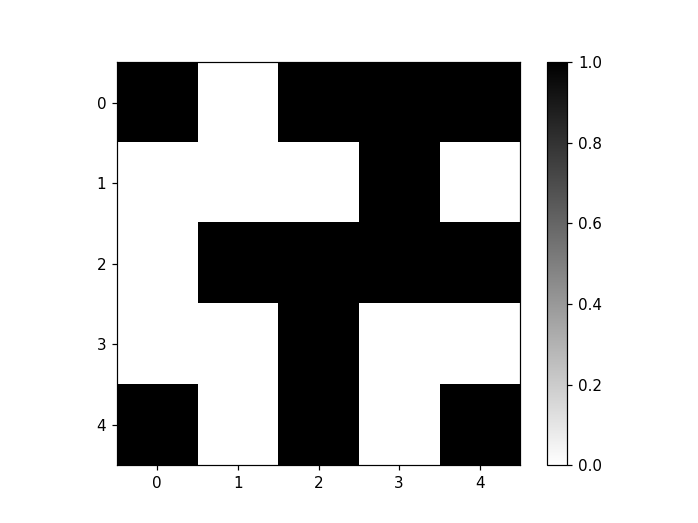

In [68]:
plt.figure()
plt.imshow(cells, cmap = cm.binary)
plt.colorbar()
plt.show()

In [69]:
neighbors = np.zeros_like(cells) # Matrice des voisins
neighbors

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [70]:
#%%timeit
# méthode intuitive ?
neighbors = np.zeros_like(cells) # Matrice des voisins
Nl, Nc = cells.shape
for l in range(Nl): # On parcoure les lignes
    for c in range(Nc): # On parcoure les colonnes
        cell = cells[l,c]
        if c < Nc-1:
            neighbors[l,c] += cells[l, c+1] # Voisins de droite
neighbors           

array([[0, 1, 1, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0]])

In [103]:
#%%timeit 
# Méthode Numpy
neighbors = np.zeros_like(cells) # Matrice des voisins
neighbors[  :  ,  :-1] += cells[  :  , 1:  ] # Voisin de droite
neighbors[  :-1,  :-1] += cells[ 1:  , 1:  ] # Voisin en bas à droite
neighbors[  :-1,  :  ] += cells[ 1:  ,  :  ] # Voisin en bas
neighbors[  :-1, 1:  ] += cells[ 1:  ,  :-1] # Voisin en bas gauche
neighbors[  :  , 1:  ] += cells[  :  ,  :-1] # Voisin de gauche
neighbors[ 1:  , 1:  ] += cells[  :-1,  :-1] # Voisin de haut gauche
neighbors[ 1:  ,  :  ] += cells[  :-1,  :  ] # Voisin de haut
neighbors[ 1:  ,  :-1] += cells[  :-1, 1:  ] # Voisin de haut droite
neighbors

array([[0, 2, 2, 3, 2],
       [2, 4, 6, 6, 5],
       [1, 2, 4, 4, 2],
       [2, 5, 4, 6, 3],
       [0, 3, 1, 3, 0]])

In [101]:
a = np.arange(10)
b = np.zeros_like(a)
b [:-1] = a[1:]
a, b

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]))

In [76]:


pos = np.arange(10).reshape(5,2)
pos

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [77]:
mass = np.arange(5)
mass

array([0, 1, 2, 3, 4])

In [80]:
pos * mass[:, np.newaxis]

array([[ 0,  0],
       [ 2,  3],
       [ 8, 10],
       [18, 21],
       [32, 36]])

Now, you need to find a way to calculate the number of living (1) neighbors around every cell. 

Tips:
* Try several methods and determine which one is the best for you,
* The use **numpy**'s slicing can help,
* Boundary conditions are importants.

Neighbors counts can be stored in a matrix like the following one:

In [7]:
neighbors = np.zeros_like(cells)
neighbors

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

## Part 2: Creating a class 

Now that you master neighbors counting, it is time to create a class to manage the evolution of the cells count. An embryo of GoL class is given below:

In [213]:
class GoL:
    """
    A game of life class.
    """
    
    def __init__(self, cells):
        self.cells = np.array(cells)
     
    def __repr__(self):
        return "<GoL with {0} cells>".format(self.cells.size)
        
    def count_living_neighbors(self):
        """
        Counts the number of living neighbors of each cell.
        """
        cells = self.cells
        neighbors = np.zeros_like(self.cells) # Matrice des voisins
        neighbors[  :  ,  :-1] += cells[  :  , 1:  ] # Voisin de droite
        neighbors[  :-1,  :-1] += cells[ 1:  , 1:  ] # Voisin en bas à droite
        neighbors[  :-1,  :  ] += cells[ 1:  ,  :  ] # Voisin en bas
        neighbors[  :-1, 1:  ] += cells[ 1:  ,  :-1] # Voisin en bas gauche
        neighbors[  :  , 1:  ] += cells[  :  ,  :-1] # Voisin de gauche
        neighbors[ 1:  , 1:  ] += cells[  :-1,  :-1] # Voisin de haut gauche
        neighbors[ 1:  ,  :  ] += cells[  :-1,  :  ] # Voisin de haut
        neighbors[ 1:  ,  :-1] += cells[  :-1, 1:  ] # Voisin de haut droite
        return neighbors
    
    def step(self):
        """
        make an evolution step forward.
        """
        n, c = self.count_living_neighbors(), self.cells
        test = (
         ((c == 0) & (n == 4)) # Je suis mort mais j'ai 3 voisins vivants !
         | # Ou ?
         ((c == 1) & ( (n == 1) 
                      #|(n == 2) 
                      |(n == 3)
                      |(n == 5))
         )) # Je vivant et je le reste !
        self.cells = test.astype(np.int8)

        
        
g = GoL(cells)
for i in range(1000):
    g.step()

g.cells

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ..., 
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

## Part 3: animate your work

Now, it's time to animate your work. For that purpose, you can use a modified version of the following code that animates a random image:

<IPython.core.display.Javascript object>


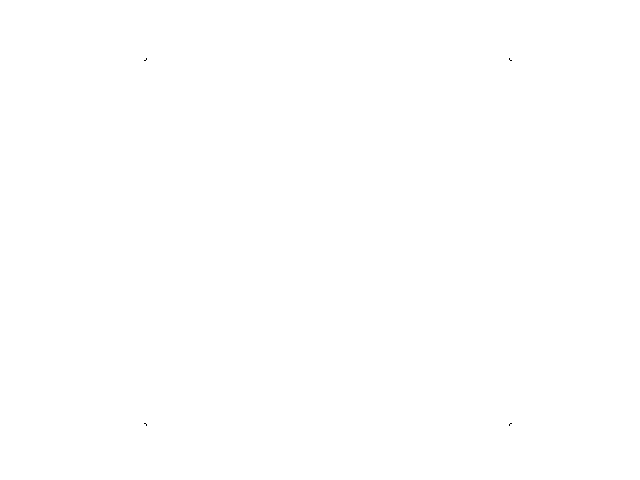

In [214]:
def updatefig(*args):
    g.step()
    im.set_array(g.cells)
    return im,

#cells = np.random.randint(2, size = (100, 100)) 
cells = np.zeros((250, 250), dtype = np.uint8)
cells[1:-1, 1:-1] = 1
g = GoL(cells)
fig, ax = plt.subplots()
ax.axis('off')
im = plt.imshow(g.cells, interpolation = "nearest", 
                cmap = cm.binary, animated = True)
anim = animation.FuncAnimation(fig, updatefig, frames=40, 
                               interval=20, blit=True)
plt.show()
#plt.close()
#anim

### Part 4: Other rules

GoL is just the set of rules **B3/S23** in the wider group of **Life-like cellular automatons**: https://en.wikipedia.org/wiki/Life-like_cellular_automaton

Modify your work in order to be able to simulate other rules.